In [1]:
# The following codes can be used to replicate the lecture routines

# Seminar Applications: basic routines of time series 


In [2]:
import pandas as pd

In [3]:
# Macroeconomic Data from Sims 
# Data consists of rt: interest rates, mt: money supply, pt: price level, ot: output


In [4]:
data=pd.read_excel('sims_data.xlsx')

In [5]:
import numpy as np
data['lpt']=np.log(data['pt'])

In [6]:
import matplotlib.pyplot as plt

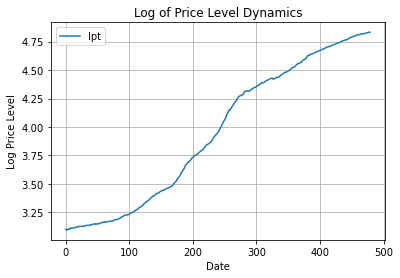

In [7]:
plt.figure(1)
plt.plot(data['lpt'], label='lpt')
plt.xlabel('Date')
plt.ylabel('Log Price Level')
plt.title('Log of Price Level Dynamics')
plt.grid(True)
plt.legend()
plt.show()

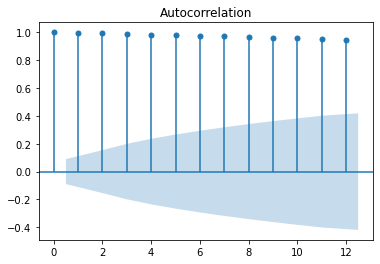

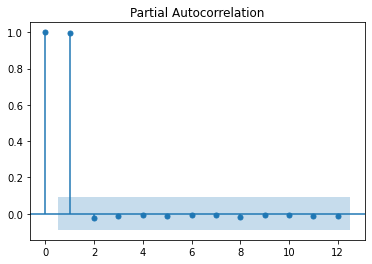

In [8]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(data["lpt"].values.squeeze(), lags=12) # The ACF
plt.show()

sm.graphics.tsa.plot_pacf(data["lpt"].values.squeeze(), lags=12) # The PACF
plt.show()

In [9]:
import statsmodels.tsa.api as smt


acf,q,pval=smt.acf(data['lpt'], nlags=12, qstat=True)
pacf = smt.pacf(data['lpt'],nlags=12)

correlogram=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(correlogram)


         acf      pacf            Q          p-val
0   0.995826  0.997905   478.982738  3.557116e-106
1   0.991576 -0.021451   954.879207  4.473163e-208
2   0.987276 -0.014817  1427.646393  2.951746e-309
3   0.982961 -0.006640  1897.273943   0.000000e+00
4   0.978601 -0.013615  2363.724870   0.000000e+00
5   0.974222 -0.007489  2826.986070   0.000000e+00
6   0.969821 -0.008399  3287.041364   0.000000e+00
7   0.965357 -0.018042  3743.837606   0.000000e+00
8   0.960875 -0.007259  4197.362580   0.000000e+00
9   0.956377 -0.006715  4647.607147   0.000000e+00
10  0.951838 -0.012998  5094.539009   0.000000e+00
11  0.947258 -0.012644  5538.126462   0.000000e+00


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [10]:
ar1=smt.ARIMA(data['lpt'],order=(1,0,0)).fit()
print(ar1.summary())

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:218: RuntimeWarning: divide by zero encountered in true_divide
  loglike, sigma2 

                              ARMA Model Results                              
Dep. Variable:                    lpt   No. Observations:                  480
Model:                     ARMA(1, 0)   Log Likelihood                1864.661
Method:                       css-mle   S.D. of innovations              0.005
Date:                Tue, 26 Apr 2022   AIC                          -3723.322
Time:                        13:31:17   BIC                          -3710.801
Sample:                             0   HQIC                         -3718.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9658      0.862      4.599      0.000       2.276       5.656
ar.L1.lpt      1.0000   2.32e-05   4.31e+04      0.000       1.000       1.000
                                    Roots           

In [11]:
ar2=smt.ARIMA(data['lpt'],order=(2,0,0)).fit()
print(ar2.summary())

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    lpt   No. Observations:                  480
Model:                     ARMA(2, 0)   Log Likelihood                2085.647
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4163.295
Time:                        13:31:18   BIC                          -4146.600
Sample:                             0   HQIC                         -4156.732
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0278   8.18e-05   3.79e+05      0.000      31.028      31.028
ar.L1.lpt      1.9231        nan        nan        nan         nan         nan
ar.L2.lpt     -0.9231        nan        nan        n

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [12]:
ar3=smt.ARIMA(data['lpt'],order=(3,0,0)).fit()
print(ar3.summary())


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    lpt   No. Observations:                  480
Model:                     ARMA(3, 0)   Log Likelihood                2111.781
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4213.561
Time:                        13:31:18   BIC                          -4192.692
Sample:                             0   HQIC                         -4205.358
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1233        nan        nan        nan         nan         nan
ar.L1.lpt      1.2983   6.65e-10   1.95e+09      0.000       1.298       1.298
ar.L2.lpt      0.3859        nan        nan        n

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [13]:
def LogDiff(x):
        x_diff=100*np.log(x/x.shift(1))  # note here: you do not need to multiply by 100
        return x_diff

In [14]:
data['dp']=LogDiff(data['lpt'])

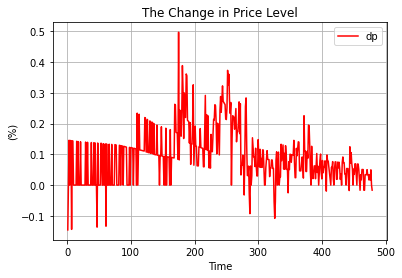

In [15]:
plt.figure(1)
plt.plot(data['dp'], label='dp', color='red')
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('The Change in Price Level')
plt.grid(True)  # note the change here. I removed the grid lines
plt.legend()
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


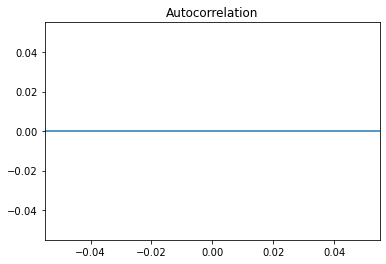

In [16]:
sm.graphics.tsa.plot_acf(data["dp"].values.squeeze(), lags=12) # The ACF
plt.show()

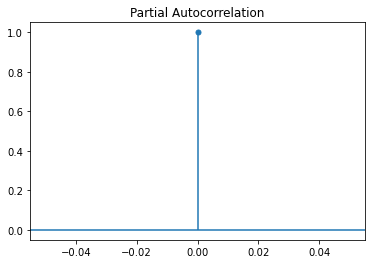

In [17]:
sm.graphics.tsa.plot_pacf(data["dp"].values.squeeze(), lags=12) # The PACF
plt.show()

In [18]:
acf,q,pval=smt.acf(data['dp'], nlags=120, qstat=True)
pacf = smt.pacf(data['dp'],nlags=120)

correlogram=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(correlogram)


     acf  pacf   Q  p-val
0    NaN   NaN NaN    NaN
1    NaN   NaN NaN    NaN
2    NaN   NaN NaN    NaN
3    NaN   NaN NaN    NaN
4    NaN   NaN NaN    NaN
..   ...   ...  ..    ...
115  NaN   NaN NaN    NaN
116  NaN   NaN NaN    NaN
117  NaN   NaN NaN    NaN
118  NaN   NaN NaN    NaN
119  NaN   NaN NaN    NaN

[120 rows x 4 columns]


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [19]:
dar1=smt.ARIMA(data['lpt'],order=(1,1,0)).fit()
print(dar1.summary())
res_dar1=dar1.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dar1, nlags=12, qstat=True)
pacf = smt.pacf(res_dar1,nlags=12)
corr1=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr1)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release o

                             ARIMA Model Results                              
Dep. Variable:                  D.lpt   No. Observations:                  479
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2142.250
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4278.501
Time:                        13:31:19   BIC                          -4265.986
Sample:                             1   HQIC                         -4273.581
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0036      0.000     12.379      0.000       0.003       0.004
ar.L1.D.lpt     0.5648      0.038     14.847      0.000       0.490       0.639
                                    Roots       

In [20]:
print('**********************AIC/ BIC**************************')
aic1=dar1.aic
bic1=dar1.aic
print(aic1,bic1)

**********************AIC/ BIC**************************
-4278.500768663232 -4278.500768663232


In [21]:
dar2=smt.ARIMA(data['lpt'],order=(2,1,0)).fit()
print(dar2.summary())
res_dar2=dar2.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dar2, nlags=12, qstat=True)
pacf = smt.pacf(res_dar2,nlags=12)
corr2=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr2)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.lpt   No. Observations:                  479
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2162.523
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4317.045
Time:                        13:31:20   BIC                          -4300.359
Sample:                             1   HQIC                         -4310.486
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0035      0.000      9.095      0.000       0.003       0.004
ar.L1.D.lpt     0.4047      0.044      9.207      0.000       0.319       0.491
ar.L2.D.lpt     0.2867      0.044      6.508    

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


***************Q- stat*****************
         acf      pacf          Q     p-val
0  -0.057243 -0.057363   1.579436  0.208842
1  -0.129060 -0.133330   9.624748  0.008129
2   0.047103  0.031998  10.698669  0.013472
3   0.022526  0.010655  10.944792  0.027192
4   0.063198  0.077974  12.886162  0.024469
5   0.039086  0.052460  13.630312  0.034050
6   0.100203  0.128309  18.531508  0.009789
7   0.035875  0.060178  19.161087  0.014021
8   0.091693  0.130805  23.282607  0.005592
9   0.080688  0.103048  26.480964  0.003144
10  0.077533  0.122207  29.440404  0.001939
11  0.188031  0.232470  46.883414  0.000005


In [22]:
# Estimating AR(3)
dar3=smt.ARIMA(data['lpt'],order=(3,1,0)).fit()
print(dar3.summary())
res_dar3=dar3.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dar3, nlags=12, qstat=True)
pacf = smt.pacf(res_dar3,nlags=12)
corr3=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr3)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.lpt   No. Observations:                  479
Model:                 ARIMA(3, 1, 0)   Log Likelihood                2170.448
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4330.896
Time:                        13:31:20   BIC                          -4310.037
Sample:                             1   HQIC                         -4322.696
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0035      0.000      7.528      0.000       0.003       0.004
ar.L1.D.lpt     0.3513      0.045      7.768      0.000       0.263       0.440
ar.L2.D.lpt     0.2143      0.047      4.568    

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [23]:
# Estimating MA(1)
dma1=smt.ARIMA(data['lpt'],order=(0,1,1)).fit()
print(dma1.summary())
res_dma1=dma1.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dma1, nlags=12, qstat=True)
pacf = smt.pacf(res_dma1,nlags=12)
corr4=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr4)

                             ARIMA Model Results                              
Dep. Variable:                  D.lpt   No. Observations:                  479
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2106.084
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4206.168
Time:                        13:31:20   BIC                          -4193.653
Sample:                             1   HQIC                         -4201.248
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0036      0.000     19.031      0.000       0.003       0.004
ma.L1.D.lpt     0.3929      0.035     11.220      0.000       0.324       0.462
                                    Roots       

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release o

In [24]:
# Estimating AR(2)
dma2=smt.ARIMA(data['lpt'],order=(0,1,2)).fit()
print(dma2.summary())
res_dma2=dma2.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dma2, nlags=12, qstat=True)
pacf = smt.pacf(res_dma2,nlags=12)
corr5=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr5)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.lpt   No. Observations:                  479
Model:                 ARIMA(0, 1, 2)   Log Likelihood                2128.755
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4249.510
Time:                        13:31:20   BIC                          -4232.823
Sample:                             1   HQIC                         -4242.950
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0036      0.000     16.509      0.000       0.003       0.004
ma.L1.D.lpt     0.4011      0.046      8.652      0.000       0.310       0.492
ma.L2.D.lpt     0.2784      0.039      7.077    

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [25]:
# Estimating AR(3)
dma3=smt.ARIMA(data['lpt'],order=(0,1,3)).fit()
print(dma3.summary())
res_dma3=dma3.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_dma3, nlags=12, qstat=True)
pacf = smt.pacf(res_dma3,nlags=12)
corr6=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr6)


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.lpt   No. Observations:                  479
Model:                 ARIMA(0, 1, 3)   Log Likelihood                2142.834
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4275.668
Time:                        13:31:20   BIC                          -4254.809
Sample:                             1   HQIC                         -4267.468
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0036      0.000     14.726      0.000       0.003       0.004
ma.L1.D.lpt     0.3965      0.046      8.565      0.000       0.306       0.487
ma.L2.D.lpt     0.3059      0.041      7.456    

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [26]:
# Estimating the ARIMA(1,0,1) models

# Estimating ARIMA(1,0,1)
#arma11=smt.ARIMA(data['lpt'],order=(1,0,1)).fit()
#print(arma11.summary())

# Estimating ARIMA(1,1,1)
arima11=smt.ARIMA(data['lpt'],order=(1,1,1)).fit()
print(arima11.summary())
res_arima1=arima11.resid
print('***************Q- stat*****************')
acf,q,pval=smt.acf(res_arima1, nlags=12, qstat=True)
pacf = smt.pacf(res_arima1,nlags=12)
corr7=pd.DataFrame({'acf':acf[1:],'pacf':pacf[1:],'Q':q,'p-val':pval})
print(corr7)    

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.lpt   No. Observations:                  479
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2186.521
Method:                       css-mle   S.D. of innovations              0.003
Date:                Tue, 26 Apr 2022   AIC                          -4365.043
Time:                        13:31:21   BIC                          -4348.356
Sample:                             1   HQIC                         -4358.483
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0032      0.001      3.144      0.002       0.001       0.005
ar.L1.D.lpt     0.9775      0.012     83.376      0.000       0.955       1.000
ma.L1.D.lpt    -0.7898      0.035    -22.433    

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release o